<a href="https://colab.research.google.com/github/anshikagirdhar/23-CS-065_Anshika-Girdhar_ML-LAB_/blob/main/Experiment%202/Anshika_Girdhar_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Loading the dataset






In [2]:
from google.colab import files
uploaded = files.upload()

Saving california_housing_test.csv to california_housing_test.csv
Saving california_housing_train.csv to california_housing_train.csv


importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Data preprocessing

In [4]:
train = pd.read_csv('california_housing_train.csv')
test = pd.read_csv('california_housing_test.csv')

x_train = train.drop('median_house_value', axis=1)
y_train = train['median_house_value']

x_test = test.drop('median_house_value', axis=1)
y_test = test['median_house_value']

#standardizing x
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#adding a bias column
x_train_b = np.c_[np.ones((x_train.shape[0], 1)), x_train]  # add bias term
x_test_b = np.c_[np.ones((x_test.shape[0], 1)), x_test]



# 1) IMPLEMENTING USING NORMAL EQUATION







In [5]:
# theta = (X^T X)^(-1) X^T y
theta_best = np.linalg.inv(x_train_b.T.dot(x_train_b)).dot(x_train_b.T).dot(y_train)


In [6]:
# Predictions
y_pred_train = x_train_b.dot(theta_best)
y_pred_test_ne = x_test_b.dot(theta_best)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test_ne)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test_ne)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test_ne)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)
print("Train MAE:", mae_train)
print("Test MAE:", mae_test)
print("Train R²:", r2_train)
print("Test R²:", r2_test)


Train MSE: 4824523173.926898
Test MSE: 4867205486.92827
Train RMSE: 69458.78759326927
Test RMSE: 69765.36022216377
Train MAE: 50795.85711784919
Test MAE: 50352.22825792106
Train R²: 0.6413378529502689
Test R²: 0.6195057678312466


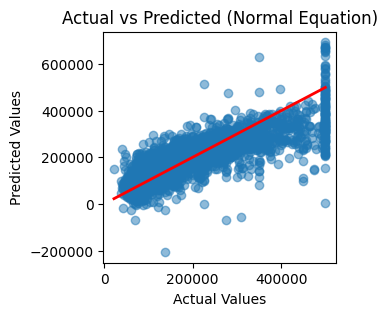

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
plt.scatter(y_test, y_pred_test_ne, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Normal Equation)")
plt.show()


# 2. Implementing gradient descend method




In [8]:
class LinearRegressionGD:
  #initializing LR
  def __init__(self, learning_rate=0.01, n_iterations=1000):
    self.lr = learning_rate
    self.iterations = n_iterations
    self.w = None
    self.b = None
    self.loss_history=[]
    self.val_loss_history=[]

  def fit(self, x, y, x_val=None, y_val=None):
    n_samples, n_features = x.shape
    self.w = np.zeros(n_features)
    self.b = 0

    for i in range(self.iterations):
      y_pred = np.dot(x, self.w) + self.b
      #gradients
      dw = (2/n_samples) * np.dot(x.T, (y_pred - y))
      db = (2/n_samples) * np.sum(y_pred - y)
      #update step
      self.w -= self.lr * dw
      self.b -= self.lr * db
      #loss calculation
      loss = np.mean((y_pred - y) ** 2)
      self.loss_history.append(loss)
      # validation loss
      if x_val is not None and y_val is not None:
        y_val_pred = np.dot(x_val, self.w) + self.b
        val_loss = mean_squared_error(y_val, y_val_pred)
        self.val_loss_history.append(val_loss)

  def predict(self,x):
    return np.dot(x, self.w) + self.b

  def mse(self, y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

  def rmse(self, y_true, y_pred):
    return np.sqrt(self.mse(y_true, y_pred))

  def mae(self, y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [9]:
model = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)
model.fit(x_train_scaled, y_train, x_val=x_test_scaled, y_val=y_test)
y_pred_train = model.predict(x_train_scaled)
y_pred_test = model.predict(x_test_scaled)
print("MSE:", model.mse(y_test, y_pred_test))
print("RMSE:", model.rmse(y_test, y_pred_test))
print("MAE:", model.mae(y_test, y_pred_test))
print("Weights:", model.w)
print("Bias:", model.b)

MSE: 4930245635.402184
RMSE: 70215.70789646846
MAE: 50627.22726206362
Weights: [-63427.82030553 -68813.5425255   17379.77367977 -13882.36851554
  31818.83236907 -41702.13300985  29521.10215493  78692.9721528 ]
Bias: 207300.91200406014


#Visualisation for different learning rates


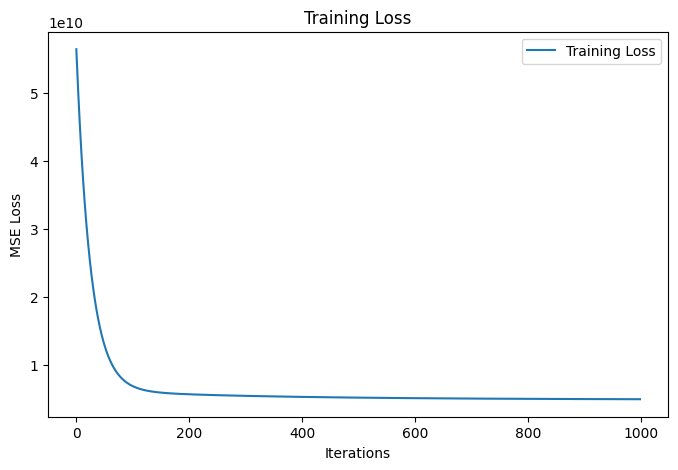

In [10]:
plt.figure(figsize=(8,5))
plt.plot(model.loss_history, label="Training Loss")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Training Loss")
plt.legend()
plt.show()

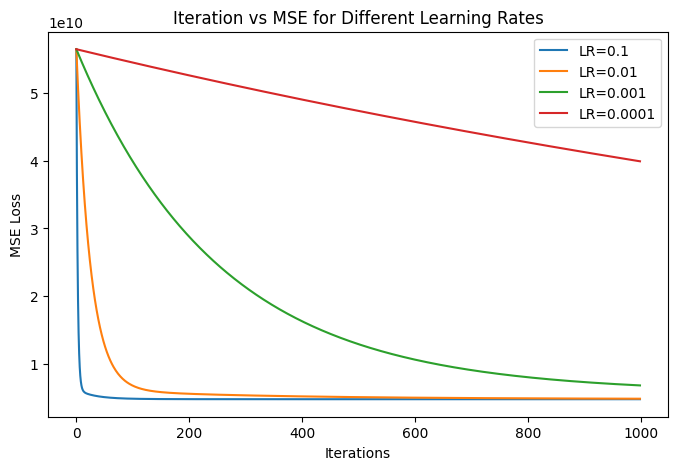

In [11]:
# Try different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
iterations = 1000

plt.figure(figsize=(8,5))

for lr in learning_rates:
    reg = LinearRegressionGD(learning_rate=lr, n_iterations=1000)
    reg.fit(x_train_scaled, y_train)

    # Plot the training loss for each LR
    plt.plot(range(iterations), reg.loss_history, label=f'LR={lr}')

plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Iteration vs MSE for Different Learning Rates")
plt.legend()
plt.show()


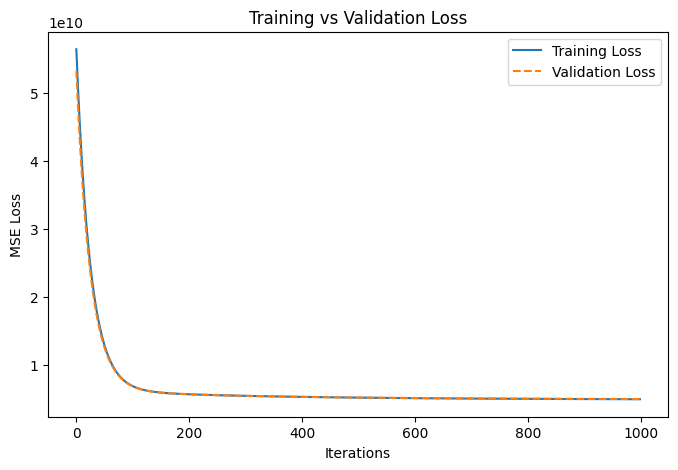

In [17]:
plt.figure(figsize=(8,5))
plt.plot(model.loss_history, label="Training Loss")
plt.plot(model.val_loss_history, label="Validation Loss", linestyle="--")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

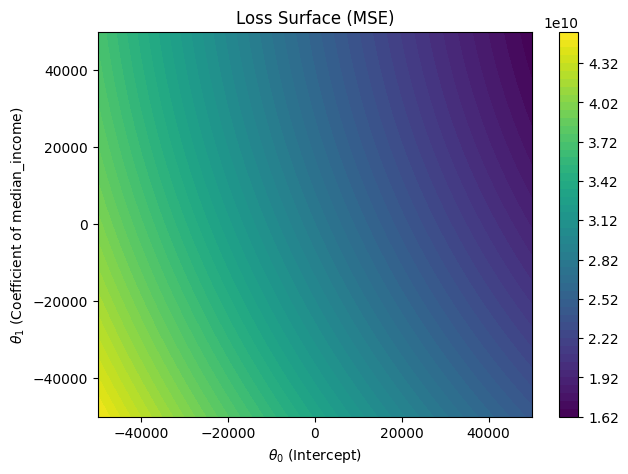

In [20]:
 #Take only 1 feature (median_income) + intercept
x_vis = x_train[['median_income']].values
scaler = StandardScaler()
x_vis_scaled = scaler.fit_transform(x_vis)

# Add intercept term
x_vis_b = np.c_[np.ones((x_vis_scaled.shape[0], 1)), x_vis_scaled]
y_vis = y_train.values.reshape(-1, 1)

# Define parameter grid (smaller range since feature is standardized)
theta0_vals = np.linspace(-50000, 50000, 100)   # intercept
theta1_vals = np.linspace(-50000, 50000, 100)   # coefficient
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

# Compute loss (MSE) for each grid point
J_vals = np.zeros_like(T0, dtype=float)
m = len(y_vis)

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        theta_try = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        errors = x_vis_b @ theta_try - y_vis
        J_vals[j, i] = (1/(2*m)) * np.sum(errors**2)

# Plot loss surface
plt.figure(figsize=(7,5))
cp = plt.contourf(T0, T1, J_vals, 50, cmap='viridis')
plt.colorbar(cp)
plt.xlabel(r"$\theta_0$ (Intercept)")
plt.ylabel(r"$\theta_1$ (Coefficient of median_income)")
plt.title("Loss Surface (MSE)")
plt.savefig("loss_surface.png", dpi=300)
plt.show()



# > 3. Implementing using scikit-learn



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
model_sc= LinearRegression()
model_sc.fit(x_train_scaled, y_train)
y_pred_skl = model_sc.predict(x_test_scaled)
mse_sc=mean_squared_error(y_test, y_pred_skl)
rmse_sc = np.sqrt(mse_sc)
mae_sc = mean_absolute_error(y_test, y_pred_skl)
print("Mean Squared Error:", mse_sc)
print("Root Mean Squared Error:", rmse_sc)
print("Mean Absolute Error:", mae_sc)
print("Coefficients:", model_sc.coef_)
print("Intercept:", model_sc.intercept_)

Mean Squared Error: 4867205486.928867
Root Mean Squared Error: 69765.36022216805
Mean Absolute Error: 50352.228257942894
Coefficients: [-86499.60728226 -91744.05083061  14483.29860201 -18263.60700749
  49587.33777166 -44178.15153005  17470.57604338  77291.55314914]
Intercept: 207300.91235294065


# Evaluation metrics

In [15]:
def evaluate(y_true, y_pred, method_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"--- {method_name} ---")
    print(f"MSE  : {mse:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R^2  : {r2:.4f}")
    print(f"MAE  : {mae:.4f}\n")

# Evaluate all three
evaluate(y_test, y_pred_test_ne, "Normal Equation")
evaluate(y_test, y_pred_test, "Gradient Descent")
evaluate(y_test, y_pred_skl, "Sklearn LinearRegression")


--- Normal Equation ---
MSE  : 4867205486.9283
RMSE : 69765.3602
R^2  : 0.6195
MAE  : 50352.2283

--- Gradient Descent ---
MSE  : 4930245635.4022
RMSE : 70215.7079
R^2  : 0.6146
MAE  : 50627.2273

--- Sklearn LinearRegression ---
MSE  : 4867205486.9289
RMSE : 69765.3602
R^2  : 0.6195
MAE  : 50352.2283



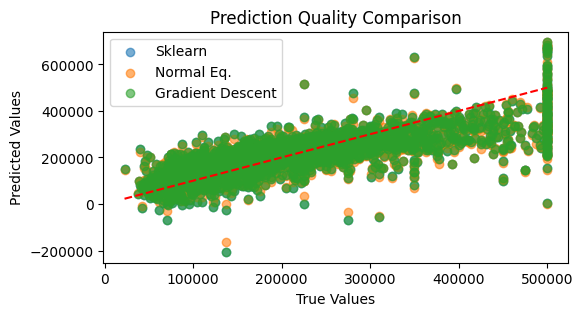

In [21]:
plt.figure(figsize=(6,3))
plt.scatter(y_test, y_pred_test_ne, label="Sklearn", alpha=0.6)
plt.scatter(y_test, y_pred_test, label="Normal Eq.", alpha=0.6)
plt.scatter(y_test, y_pred_skl, label="Gradient Descent", alpha=0.6)

# Ideal line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Prediction Quality Comparison")
plt.legend()
plt.show()